In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# データ分析

## 1.データの概要確認
#### ・データ型の確認
#### ・欠損値や分布を把握する

In [4]:
# ライブラリのインポート
import pandas as pd

# データ読み込み
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csvファイル/customer_data.csv")

# データの概要確認
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    int64 
 1   Age               500 non-null    int64 
 2   Gender            500 non-null    object
 3   AnnualIncome      500 non-null    int64 
 4   SpendingScore     500 non-null    int64 
 5   PurchaseCategory  500 non-null    object
dtypes: int64(4), object(2)
memory usage: 23.6+ KB
None
       CustomerID         Age  AnnualIncome  SpendingScore
count  500.000000  500.000000     500.00000     500.000000
mean   250.500000   44.732000     696.35800      50.240000
std    144.481833   15.239707     298.08422      29.490911
min      1.000000   18.000000     200.00000       0.000000
25%    125.750000   32.000000     431.50000      24.750000
50%    250.500000   45.000000     711.00000      50.000000
75%    375.250000   57.000000     973.50000      76.250000


## 2.基本的な可視化
### 年齢分布のヒストグラム

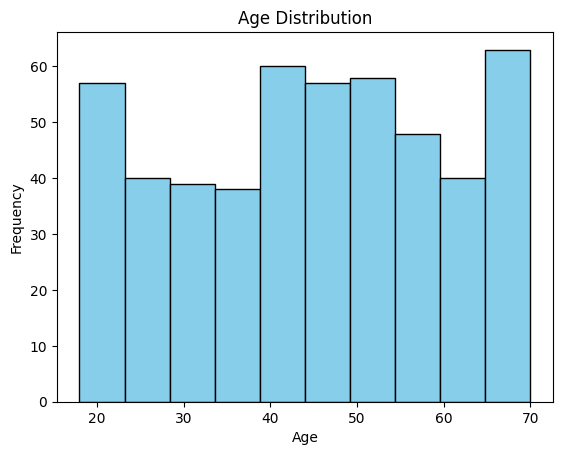

In [5]:
import matplotlib.pyplot as plt

plt.hist(df["Age"], bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### 消費スコアと年収の散布図

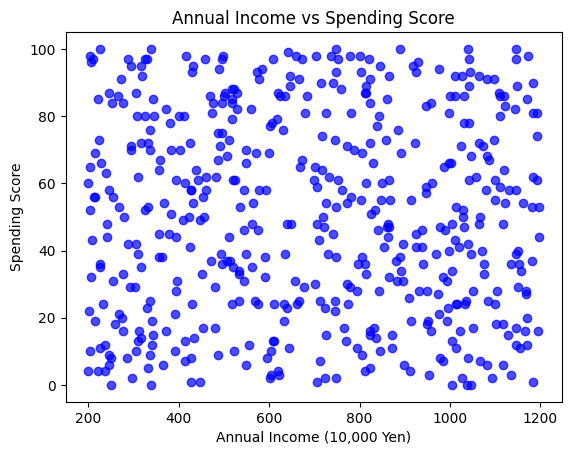

In [6]:
plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.7, c="blue")
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (10,000 Yen)")
plt.ylabel("Spending Score")
plt.show()

## 3.カテゴリごとの分析
### 購入カテゴリごとの平均消費スコアを比較

PurchaseCategory
Electronics    53.372881
Fashion        48.472868
Grocery        46.115702
Sports         52.946970
Name: SpendingScore, dtype: float64


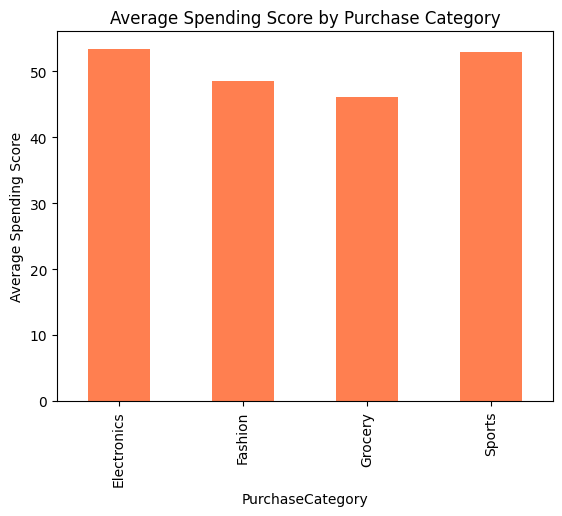

In [7]:
category_analysis = df.groupby("PurchaseCategory")["SpendingScore"].mean()
print(category_analysis)
category_analysis.plot(kind="bar", color="coral")
plt.title("Average Spending Score by Purchase Category")
plt.ylabel("Average Spending Score")
plt.show()

## 4.クラスタリング
### 目的：消費スコアと年収を基に顧客をグループ分け

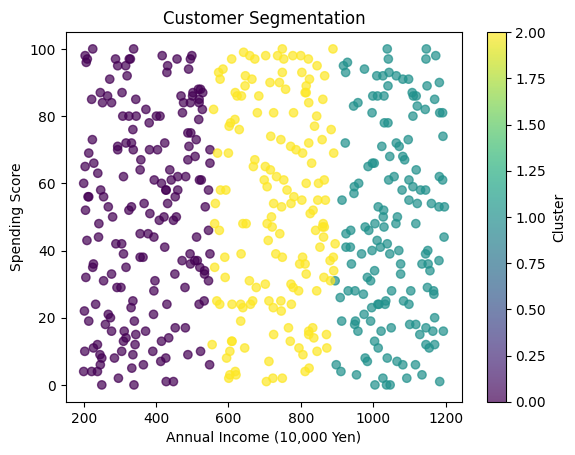

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# クラスタリング用データ準備
X = df[["AnnualIncome", "SpendingScore"]].values

# K-meansモデルの作成
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# 結果の可視化
plt.scatter(X[:, 0], X[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.title("Customer Segmentation")
plt.xlabel("Annual Income (10,000 Yen)")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster")
plt.show()

## 5.回帰分析(年収と消費スコアの関係)
### 目的：年収が消費スコアに与える影響を調査

Coefficient: -0.0011755755724036007
Intercept: 51.05862145444783


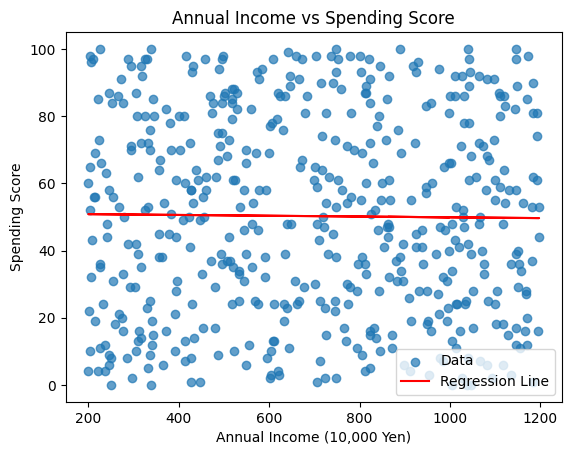

In [9]:
from sklearn.linear_model import LinearRegression

# モデル準備
X = df[["AnnualIncome"]]
y = df["SpendingScore"]
model = LinearRegression()
model.fit(X, y)

# 結果表示
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# 予測値をプロット
plt.scatter(df["AnnualIncome"], df["SpendingScore"], alpha=0.7, label="Data")
plt.plot(df["AnnualIncome"], model.predict(X), color="red", label="Regression Line")
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (10,000 Yen)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

### これらの分析結果から得られる洞察
#### ・年齢や年収の分布から、顧客層を理解できる
#### ・購入カテゴリ別の行動特徴を特定し、マーケティング戦略を改善
#### ・クラスタリングにより、顧客をセグメント化してターゲットを特定
#### ・回帰分析で収入と消費の関係を把握し、収益予測に活用

# 機械学習

## 1. 分類タスク：性別を予測する

### 目的：年齢、年収、消費スコアなどの特徴量を使用して顧客の性別を予測します。

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 特徴量とターゲットの準備
X = df[["Age", "AnnualIncome", "SpendingScore"]]
y = df["Gender"].map({"Male": 0, "Female": 1})  # 性別を数値化

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの訓練
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# テストデータでの予測
y_pred = clf.predict(X_test)

# 結果の評価
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.65      0.57        79
           1       0.44      0.31      0.36        71

    accuracy                           0.49       150
   macro avg       0.47      0.48      0.47       150
weighted avg       0.48      0.49      0.47       150



## 2. 回帰タスク：消費スコアを予測する

### 目的：年齢、年収などの特徴量を使って消費スコアを予測します

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 特徴量とターゲットの準備
X = df[["Age", "AnnualIncome"]]
y = df["SpendingScore"]

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの訓練
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# テストデータでの予測
y_pred = reg.predict(X_test)

# 結果の評価
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1077.0939806666663


## 3. クラスタリング：顧客セグメンテーション

### 目的：年収と消費スコアを基に顧客をクラスタリングします。

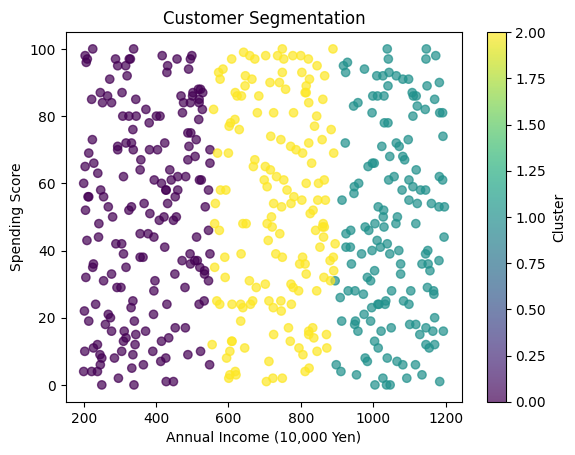

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# クラスタリング用データ
X = df[["AnnualIncome", "SpendingScore"]]

# モデルの訓練
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# 結果の可視化
plt.scatter(X["AnnualIncome"], X["SpendingScore"], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.title("Customer Segmentation")
plt.xlabel("Annual Income (10,000 Yen)")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster")
plt.show()

## 4. ディープラーニング：性別の予測（ニューラルネットワーク）

### 目的：ニューラルネットワークを使って性別を予測します。

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# 特徴量とターゲットの準備
X = df[["Age", "AnnualIncome", "SpendingScore"]]
y = df["Gender"].map({"Male": 0, "Female": 1})

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# モデル構築
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

# モデルコンパイル
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# モデル訓練
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# モデル評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5421 - loss: 0.7029 - val_accuracy: 0.4571 - val_loss: 0.7133
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5084 - loss: 0.6970 - val_accuracy: 0.4714 - val_loss: 0.7053
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4810 - loss: 0.6953 - val_accuracy: 0.4714 - val_loss: 0.7006
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5205 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6988
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5765 - loss: 0.6819 - val_accuracy: 0.4857 - val_loss: 0.6983
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5715 - loss: 0.6810 - val_accuracy: 0.4857 - val_loss: 0.6975
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6015 - loss: 0.6798 - val_accuracy: 0.4857 - val_loss: 0.6964
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5037 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 9/20
9/9 ━━━

## 5. モデル選択とハイパーパラメータチューニング

GridSearchCVやRandomizedSearchCVを使って、ランダムフォレストやサポートベクターマシンの最適なパラメータを見つけます。
### 実践に役立てるためのポイント
#### データの前処理
* 欠損値や異常値を処理し、必要に応じて標準化や正規化を行います。
#### 評価指標の選択
* 分類タスクでは、精度、F1スコア、ROC-AUCを重視。
* 回帰タスクでは、MSEやR²を使用。
#### 特徴量エンジニアリング
* 新しい特徴量を作成したり、特徴量の重要度を評価したりします。